# **Dataset and Classification Model**

**MNIST Training/Test Set**

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
313/313 [==============================] - 1s 2ms/step - loss: 2.3616 - accuracy: 0.0876
Initial test accuracy: 0.08760000020265579
Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2380 - accuracy: 0.9302 - val_loss: 0.1090 - val_accuracy: 0.9674
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0872 - accuracy: 0.9738 - val_loss: 0.0844 - val_accuracy: 0.9739
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0656 - val_accuracy: 0.9795
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0392 - accuracy: 0.9871 - val_loss: 0.0616 - val_accuracy: 0.9807
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0704 - val_accuracy: 0.9799
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0229 - accuracy: 0.9927 - 

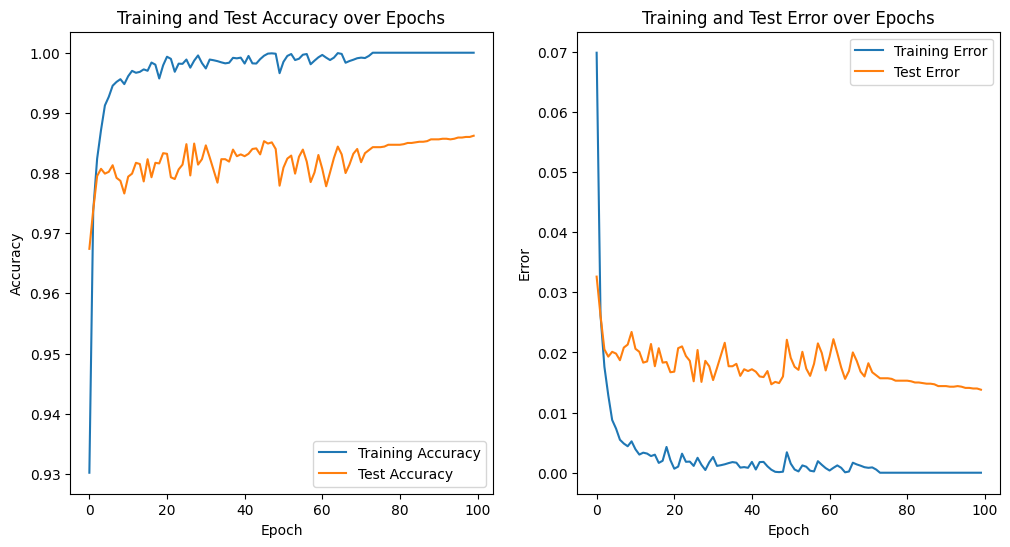

In [ ]:
import ssl
import tensorflow as tf
import numpy as np
# from tensorflow import math
from tensorflow import keras
import matplotlib.pyplot as plt

lr = 0.001
n_epochs = 100

ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()

n_classes = 10
n_features = x_train[0, ...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

# criterion= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# optimizer = tf.keras.optimizers.Adam(lr)

model = keras.Sequential(
    [
        keras.layers.Dense(512, input_shape=(n_features,), activation="relu", name="layer1"),
        keras.layers.Dense(128, activation="relu", name="layer2"),
        # we need to add softmax to last layer,
        # because model.compile(loss='sparse_categorical_crossentropy'
        # assumes from_logits=False, i.e., takes probabilities
        keras.layers.Dense(n_classes, activation="softmax", name="layer3"),
    ]
)

# print(model.summary())

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #optimizer=optimizer,
              #loss=criterion,
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Initial test accuracy:", test_acc)

# Train the model
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Final test accuracy:", test_acc)

# Plotting the training and test data over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(1 - np.array(history.history['accuracy']), label='Training Error')
plt.plot(1 - np.array(history.history['val_accuracy']), label='Test Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training and Test Error over Epochs')
plt.legend()

plt.show()

**CIFAR10 Training/Test Set**

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)
313/313 [==============================] - 1s 2ms/step - loss: 2.5386 - accuracy: 0.0967
Initial test accuracy: 0.09669999778270721
Epoch 1/100
391/391 [==============================] - 3s 5ms/step - loss: 1.9221 - accuracy: 0.3144 - val_loss: 1.7774 - val_accuracy: 0.3671
Epoch 2/100
391/391 [==============================] - 2s 6ms/step - loss: 1.7223 - accuracy: 0.3860 - val_loss: 1.6428 - val_accuracy: 0.4188
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 1.6349 - accuracy: 0.4158 - val_loss: 1.5968 - val_accuracy: 0.4396
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5772 - accuracy: 0.4422 - val_loss: 1.5566 - val_accuracy: 0.4445
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5267 - accuracy: 0.4563 - val_loss: 1.5161 - val_accuracy: 0.4675
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4904 - accuracy:

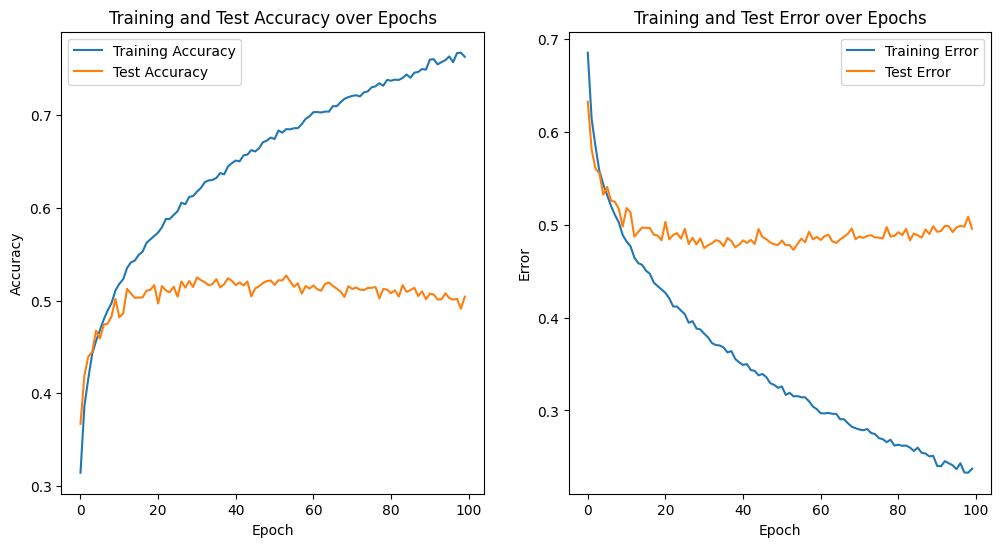

In [ ]:
import ssl
import tensorflow as tf
import numpy as np
# from tensorflow import math
from tensorflow import keras
import matplotlib.pyplot as plt

lr = 0.001
n_epochs = 100

ssl._create_default_https_context = ssl._create_unverified_context
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()

n_classes = 10
n_features = x_train[0, ...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

# criterion= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# optimizer = tf.keras.optimizers.Adam(lr)

model = keras.Sequential(
    [
        keras.layers.Dense(512, input_shape=(n_features,), activation="relu", name="layer1"),
        keras.layers.Dense(128, activation="relu", name="layer2"),
        # we need to add softmax to last layer,
        # because model.compile(loss='sparse_categorical_crossentropy'
        # assumes from_logits=False, i.e., takes probabilities
        keras.layers.Dense(n_classes, activation="softmax", name="layer3"),
    ]
)

# print(model.summary())

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #optimizer=optimizer,
              #loss=criterion,
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Initial test accuracy:", test_acc)

# Train the model
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Final test accuracy:", test_acc)

# Plotting the training and test data over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(1 - np.array(history.history['accuracy']), label='Training Error')
plt.plot(1 - np.array(history.history['val_accuracy']), label='Test Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training and Test Error over Epochs')
plt.legend()

plt.show()

# **Experiments**

Varying the number of network layers between 0 (a linear classifier) and 5, while keeping ReLU activation function

**MNIST Set**

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
Number of Layers: 0
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
313/313 [==============================] - 2s 4ms/step - loss: 2.2820 - accuracy: 0.1208
Initial test error: 0.8791999965906143
Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6615 - accuracy: 0.8396 - val_loss: 0.3841 - val_accuracy: 0.9000
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3607 - accuracy: 0.9027 - val_loss: 0.3218 - val_accuracy: 0.9115
Epoch 3/100
469/469 [==============================] - 1s 

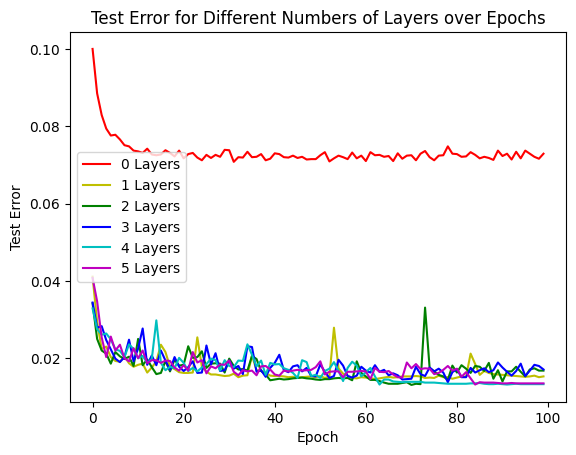

In [ ]:
import ssl
import tensorflow as tf
import numpy as np
# from tensorflow import math
from tensorflow import keras
import matplotlib.pyplot as plt

lr = 0.001
n_epochs = 100

ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()

n_classes = 10
n_features = x_train[0, ...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

layers_list = [0, 1, 2, 3, 4, 5]
all_histories = []
test_errors = []
colors = ['r', 'y', 'g', 'b', 'c', 'm']  # Colors for each line
j = 0 # track index of layers

for num_layers in layers_list:
  print(f"Number of Layers: {num_layers}")
  if num_layers == 0:
    model = keras.Sequential()
    model.add(keras.layers.Dense(n_classes, input_shape=(n_features,), activation="softmax"))
  else:
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, input_shape=(n_features,), activation="relu"))
    for i in range(num_layers):
      if i == num_layers - 1:
        model.add(keras.layers.Dense(n_classes, activation="softmax"))
      else:
        model.add(keras.layers.Dense(256 // (2 ** i), activation="relu"))

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  print(model.summary())

  test_loss, test_acc = model.evaluate(x_test, y_test)
  print("Initial test error:", 1 - test_acc)

  # Train the model
  history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

  all_histories.append(history)

  # Evaluate the model
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print("Final test error:", 1 - test_acc)
  test_error = [1 - acc for acc in history.history['val_accuracy']]  # Computing test error over epochs
  plt.plot(test_error, linestyle='-', color=colors[j], label=f'{num_layers} Layers')  # Plotting test error for each layer
  j += 1

plt.xlabel('Epoch')
plt.ylabel('Test Error')
plt.title('Test Error for Different Numbers of Layers over Epochs')
plt.legend()
plt.show()

**CIFAR10 Set**

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)
Number of Layers: 0
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30730 (120.04 KB)
Trainable params: 30730 (120.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
313/313 [==============================] - 1s 2ms/step - loss: 2.4848 - accuracy: 0.1014
Initial test error: 0.8985999971628189
Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 1.9401 - accuracy: 0.3117 - val_loss: 1.8464 - val_accuracy: 0.3513
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 1.8270 - accuracy: 0.3623 - val_loss: 1.8067

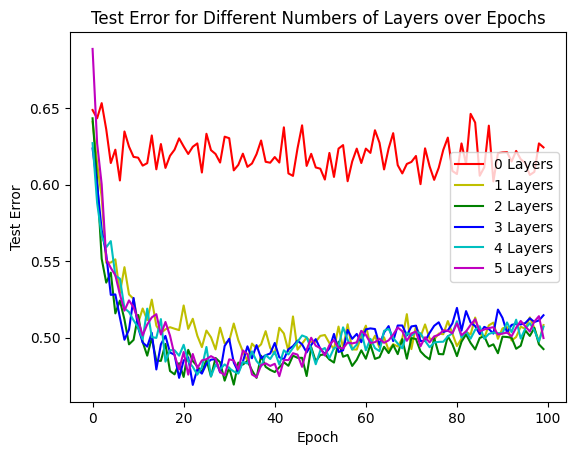

In [ ]:
import ssl
import tensorflow as tf
import numpy as np
# from tensorflow import math
from tensorflow import keras
import matplotlib.pyplot as plt

lr = 0.001
n_epochs = 100

ssl._create_default_https_context = ssl._create_unverified_context
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()

n_classes = 10
n_features = x_train[0, ...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

layers_list = [0, 1, 2, 3, 4, 5]
all_histories = []
test_errors = []
colors = ['r', 'y', 'g', 'b', 'c', 'm']  # Colors for each line
j = 0 # track index of layers

for num_layers in layers_list:
  print(f"Number of Layers: {num_layers}")
  if num_layers == 0:
    model = keras.Sequential()
    model.add(keras.layers.Dense(n_classes, input_shape=(n_features,), activation="softmax"))
  else:
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, input_shape=(n_features,), activation="relu"))
    for i in range(num_layers):
      if i == num_layers - 1:
        model.add(keras.layers.Dense(n_classes, activation="softmax"))
      else:
        model.add(keras.layers.Dense(256 // (2 ** i), activation="relu"))

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  print(model.summary())

  test_loss, test_acc = model.evaluate(x_test, y_test)
  print("Initial test error:", 1 - test_acc)

  # Train the model
  history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

  all_histories.append(history)

  # Evaluate the model
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print("Final test error:", 1 - test_acc)
  test_error = [1 - acc for acc in history.history['val_accuracy']]  # Computing test error over epochs
  plt.plot(test_error, linestyle='-', color=colors[j], label=f'{num_layers} Layers')  # Plotting test error for each layer
  j += 1

plt.xlabel('Epoch')
plt.ylabel('Test Error')
plt.title('Test Error for Different Numbers of Layers over Epochs')
plt.legend()
plt.show()

Varying the activation function: no activation (i.e., linear), tanh, ReLU, for network with 5 layers.

**MNIST Set**

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
Activation Function: linear
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                          

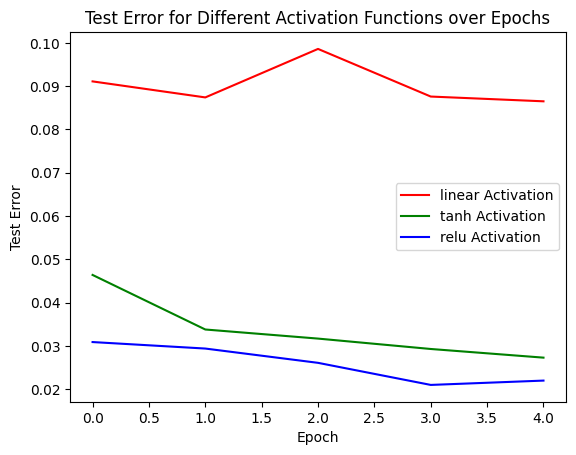

In [ ]:
import ssl
import tensorflow as tf
import numpy as np
# from tensorflow import math
from tensorflow import keras
import matplotlib.pyplot as plt

lr = 0.001
n_epochs = 5

ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()

n_classes = 10
n_features = x_train[0, ...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

activation_functions = ['linear', 'tanh', 'relu']  # Activation functions to experiment with
all_histories = []
test_errors = []
colors = ['r', 'g', 'b']
j = 0

for activation in activation_functions:
  print(f"Activation Function: {activation}")

  model = keras.Sequential()
  model.add(keras.layers.Dense(512, input_shape=(n_features,), activation=activation))
  for i in range(5):  # Ensuring 4 additional layers
    if i == 4:  # Adding the last layer with softmax
      model.add(keras.layers.Dense(n_classes, activation="softmax"))
    else:
      model.add(keras.layers.Dense(256 // (2 ** i), activation=activation))

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  print(model.summary())

  test_loss, test_acc = model.evaluate(x_test, y_test)
  print("Initial test error:", 1 - test_acc)

  # Train the model
  history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

  all_histories.append(history)

  # Evaluate the model
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print("Final test error:", 1 - test_acc)
  test_error = [1 - acc for acc in history.history['val_accuracy']]  # Computing test error over epochs
  plt.plot(test_error, linestyle='-', color=colors[j], label=f'{activation} Activation')  # Plotting test error for each layer
  j += 1

plt.xlabel('Epoch')
plt.ylabel('Test Error')
plt.title('Test Error for Different Activation Functions over Epochs')
plt.legend()
plt.show()

**CIFAR10 Set**

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)
Activation Function: linear
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               1573376   
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (

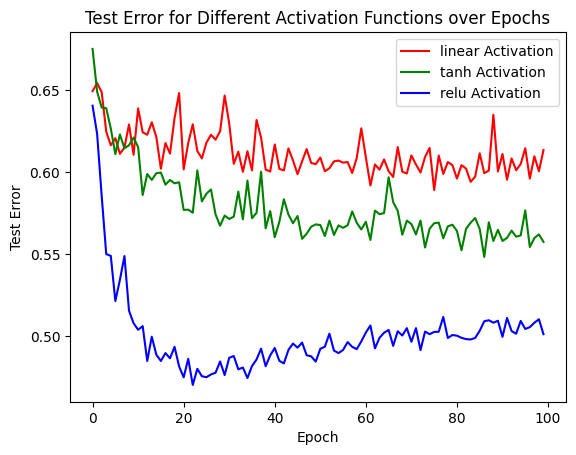

In [ ]:
import ssl
import tensorflow as tf
import numpy as np
# from tensorflow import math
from tensorflow import keras
import matplotlib.pyplot as plt

lr = 0.001
n_epochs = 100

ssl._create_default_https_context = ssl._create_unverified_context
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()

n_classes = 10
n_features = x_train[0, ...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

activation_functions = ['linear', 'tanh', 'relu']  # Activation functions to experiment with
all_histories = []
test_errors = []
colors = ['r', 'g', 'b']
j = 0

for activation in activation_functions:
  print(f"Activation Function: {activation}")

  model = keras.Sequential()
  model.add(keras.layers.Dense(512, input_shape=(n_features,), activation=activation))
  for i in range(5):  # Ensuring 4 additional layers
    if i == 4:  # Adding the last layer with softmax
      model.add(keras.layers.Dense(n_classes, activation="softmax"))
    else:
      model.add(keras.layers.Dense(256 // (2 ** i), activation=activation))

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  print(model.summary())

  test_loss, test_acc = model.evaluate(x_test, y_test)
  print("Initial test error:", 1 - test_acc)

  # Train the model
  history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

  all_histories.append(history)

  # Evaluate the model
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print("Final test error:", 1 - test_acc)
  test_error = [1 - acc for acc in history.history['val_accuracy']]  # Computing test error over epochs
  plt.plot(test_error, linestyle='-', color=colors[j], label=f'{activation} Activation')  # Plotting test error for each layer
  j += 1

plt.xlabel('Epoch')
plt.ylabel('Test Error')
plt.title('Test Error for Different Activation Functions over Epochs')
plt.legend()
plt.show()